# [DEMO] Part 4: Candidate Evaluation & Selection

## Overview
This notebook covers **Phase 4: Candidate Evaluation & Selection** of the LEGO modeling workflow. Building on the automated search from Part 3, we will:

1. **Load Candidates**: Reload models saved during the search phase
2. **Rank & Filter**: Apply business logic and weighted scoring to rank candidates
3. **Deep-Dive Evaluation**: Inspect top candidates for economic intuition, stability, and forecast credibility
4. **Champion Selection**: Choose the final champion model (and backups)

**Reference**: See section 1.2 (Phase 4) of The LEGO Playbook.

**Key concept**: While Part 3 identified *statistically valid* models, Part 4 applies *business logic* to find the *best* model for production use. This includes scenario analysis, stress testing, and expert judgment.

By the end, we'll have selected a **Champion Model** ready for final documentation and delivery in Phase 5.

In [ ]:
import pandas as pd
import Technic as tc

In [ ]:
from DEMO_1_Setup import *

In [ ]:
# ============================================================================
# Step 1: Load Saved Candidate Models
# ============================================================================

# Reload models saved during automated search (Part 3)
# The search_id identifies a specific batch of models from a particular search run
# Multiple search batches can be compared by loading different search_ids

print("Loading candidate models from search batch...")
seg.load_cms(
    search_id='search_home_price_GR1_20260129_162322',  # Replace with your search_id
)
print(f"✓ Loaded {len(seg.cms)} candidate models")

Loading passed cms:   0%|          | 0/798 [00:00<?, ?cm/s]

Loading passed cms: 100%|██████████| 798/798 [00:44<00:00, 17.80cm/s]


=== Updated Ranked Results ===
model_id  fit_score  is_err_score  oos_err_score  composite_score
     cm1   0.995421      0.917433       0.075568         0.662807
     cm2   1.000000      0.936646       0.033848         0.656831
     cm3   0.971750      0.915535       0.022119         0.636468
     cm4   0.884101      0.840879       0.116204         0.613728
     cm5   0.912316      0.861797       0.065579         0.613231
     cm6   0.904508      0.852971       0.032307         0.596595
     cm7   0.400897      0.415883       0.901566         0.572782
     cm8   0.875817      0.809511       0.029405         0.571578
     cm9   0.866198      0.822404       0.016107         0.568236
    cm10   0.792164      0.722292       0.184300         0.566252

=== Top 10 Model Formulas ===
cm1: OLS-HAC(4):home_price_GR1~C+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12+USGOV2Y_LV_L3+USPRIME_MMDF12_L2
cm2: OLS-HAC(4):home_price_GR1~C+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12+USGOV2Y_LV_L3+USPRIM

In [ ]:
# ============================================================================
# Step 2: Rank Candidates Using Weighted Business Metrics
# ============================================================================

# Apply weighted scoring to rank models by business priorities
# rank_weights tuple specifies importance of:
# 
# In this example, we weight:
#   - In-Sample Fitness (R-sq, Adj R-sq) = 1
#   - In-Sample Error (MAE, RMSE, ME) = 1
#   - Out-of-Sample Error (MAE, RMSE, ME) = 2 (emphasize models with lower OOS errors)
#
# Customize these weights to match your risk/fit preferences:

print("Ranking candidates with weighted business metrics...")

seg.rerank_cms(
    rank_weights=(1, 1, 2),  # Emphasize BIC (simplicity)
    overwrite=True            # Save updated rankings
)

print("✓ Models re-ranked and sorted by composite score")

=== Updated Ranked Results ===
model_id  fit_score  is_err_score  oos_err_score  composite_score
     cm1   0.400897      0.415883       0.901566         0.654978
     cm2   0.398466      0.354654       0.892361         0.634460
     cm3   0.303841      0.286413       0.968349         0.631738
     cm4   0.388477      0.386611       0.870839         0.629191
     cm5   0.406478      0.477184       0.814226         0.628029
     cm6   0.367833      0.358877       0.878064         0.620709
     cm7   0.361292      0.344073       0.879071         0.615877
     cm8   0.308566      0.313002       0.909570         0.610177
     cm9   0.250394      0.257182       0.964493         0.609141
    cm10   0.359895      0.319833       0.878303         0.609083

=== Top 10 Model Formulas ===
cm1: OLS-HAC(4):home_price_GR1~C+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12+USCORPBBB10Y_MMDF12+USGOV2Y_MMDF12
cm2: OLS-HAC(4):home_price_GR1~C+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12+USCORPBBB10Y_MMDF

=== Candidate Models to Report ===
- cm1: OLS-HAC(4):home_price_GR1~C+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12+USCORPBBB10Y_MMDF12+USGOV2Y_MMDF12
- cm2: OLS-HAC(4):home_price_GR1~C+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12+USCORPBBB10Y_MMDF6+USGOV10Y_MMDF6
- cm3: OLS-HAC(4):home_price_GR1~C+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12+USMORT30Y_MMDF12_L2+USPRIME_MMDF12
- cm4: OLS-HAC(4):home_price_GR1~C+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12+USCORPBBB10Y_MMDF6_L1+USGOV10Y_MMDF6
- cm5: OLS-HAC(4):home_price_GR1~C+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12+USCORPBBB10Y_MMDF3_L1+USGOV2Y_MMDF3
- cm6: OLS-HAC(4):home_price_GR1~C+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12+USCORPBBB10Y_MMDF12+USHHPDI_MMDF+USPRIME_MMDF6_L1
- cm7: OLS-HAC(4):home_price_GR1~C+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12+USCORPBBB10Y_MMDF12+USGOV2Y_MMDF12_L1
- cm8: OLS-HAC(4):home_price_GR1~C+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12+USCORPAA10Y_MMDF12_L3+USFF_MMDF6_L2+USHHPDI_

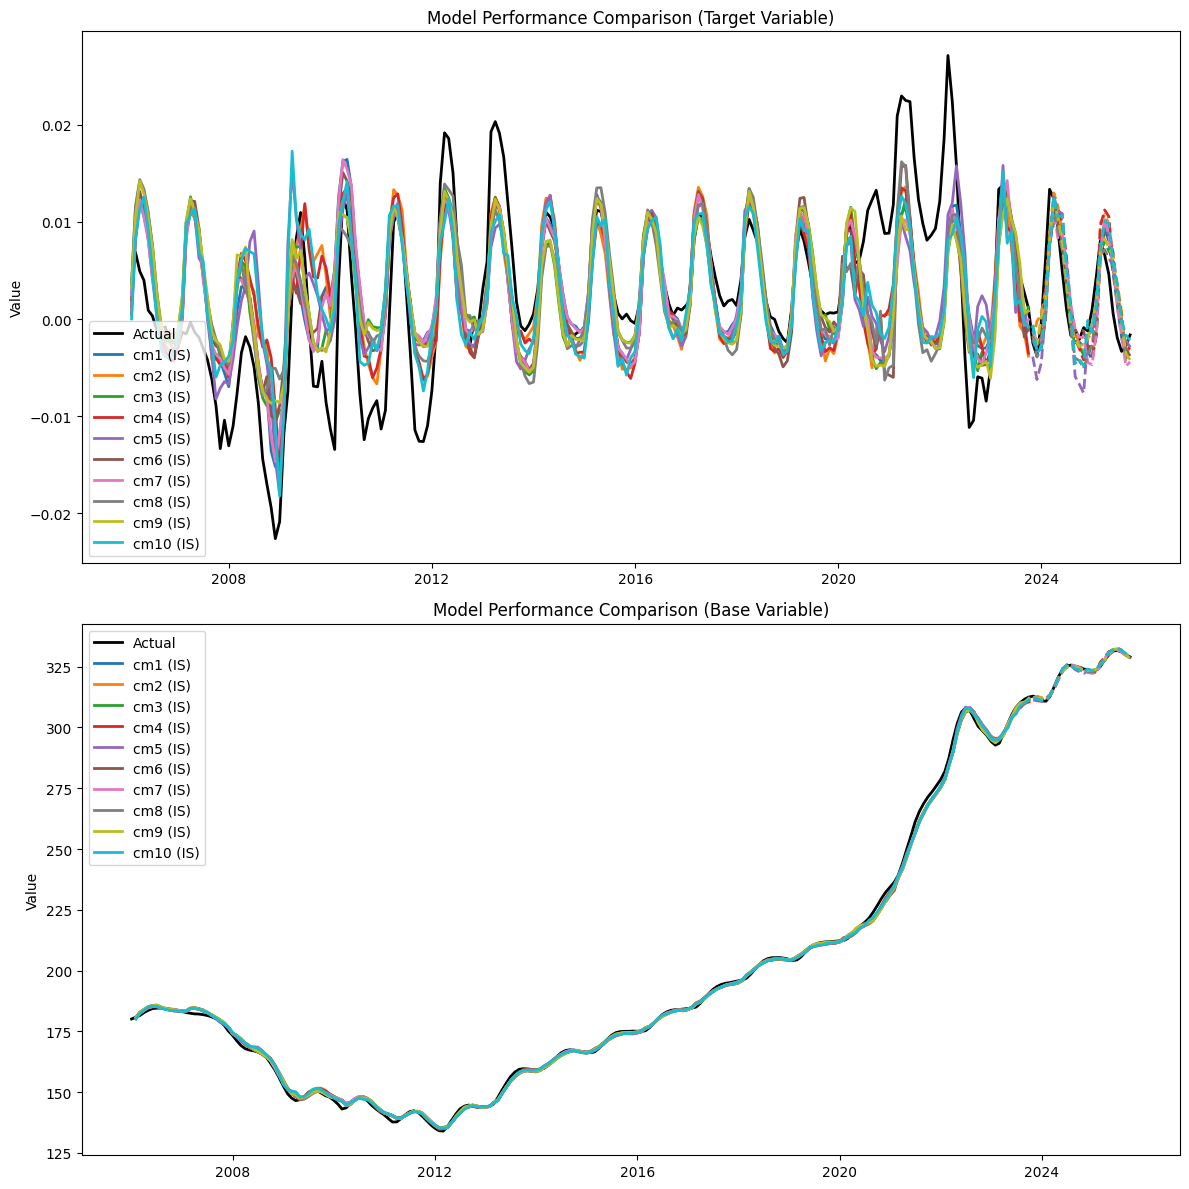

In [21]:
# ============================================================================
# Step 3: Review Candidate Summary & Rankings
# ============================================================================

# Display summary table of all candidates sorted by rank
# Includes key metrics (R², AIC, BIC, stability tests) for quick comparison
# Top-ranked models are candidates for deep-dive review

print("\n" + "="*70)
print("CANDIDATE MODELS - RANKED SUMMARY")
print("="*70)
seg.show_report(
    # show_params=True,  # Uncomment to show detailed parameter estimates
    # show_scens=True,   # Uncomment to show scenario forecasts
)

=== In-Sample Performance ===
   R²  Adj R²    ME   MAE  RMSE
0.451   0.415 0.019 0.005 0.007

=== Out-of-Sample Performance ===
   ME   MAE  RMSE
0.006 0.003 0.003

=== Model Parameters ===
           Variable       Coef Pvalue  VIF         SE  CI_2_5 CI_97_5
              const 4.6036e-04  0.800  NaN     0.0018 -0.0031  0.0040
                M:2     0.0075  0.000 1.83     0.0015  0.0046  0.0105
                M:3     0.0104  0.000 1.83     0.0018  0.0067  0.0140
                M:4     0.0097  0.000 1.83     0.0020  0.0058  0.0137
                M:5     0.0076  0.001 1.83     0.0022  0.0032  0.0120
                M:6     0.0038  0.082 1.83     0.0022 -0.0005  0.0082
                M:7 2.9487e-04  0.898 1.83     0.0023 -0.0042  0.0048
                M:8    -0.0025  0.313 1.83     0.0024 -0.0072  0.0023
                M:9    -0.0030  0.176 1.83     0.0022 -0.0073  0.0013
               M:10    -0.0033  0.096 1.79     0.0020 -0.0071  0.0006
               M:11    -0.0037  0.026 1

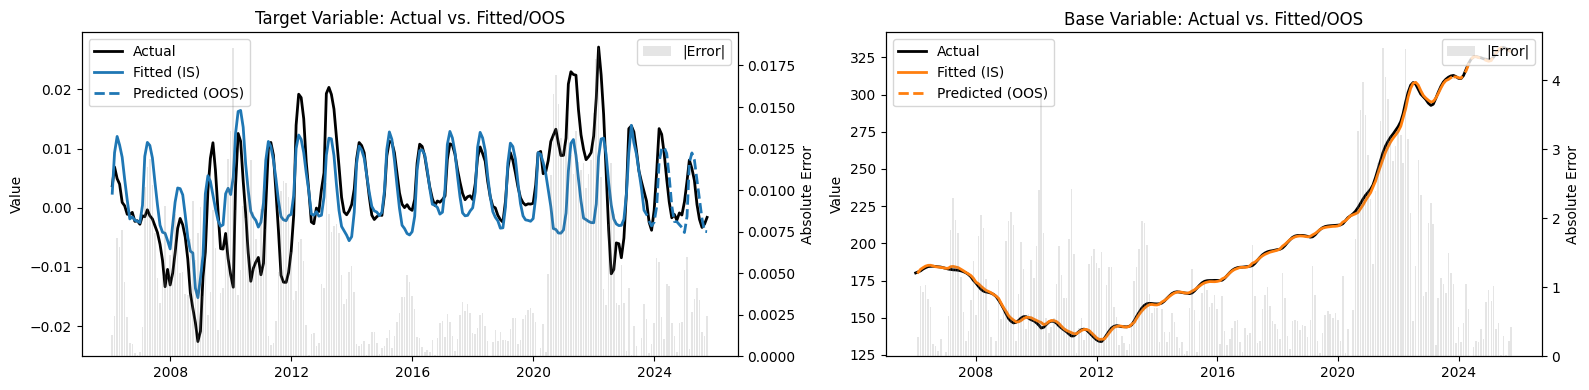


=== Model: cm1 — Scenario Analysis ===
Scenario plots for Scenario generated successfully.


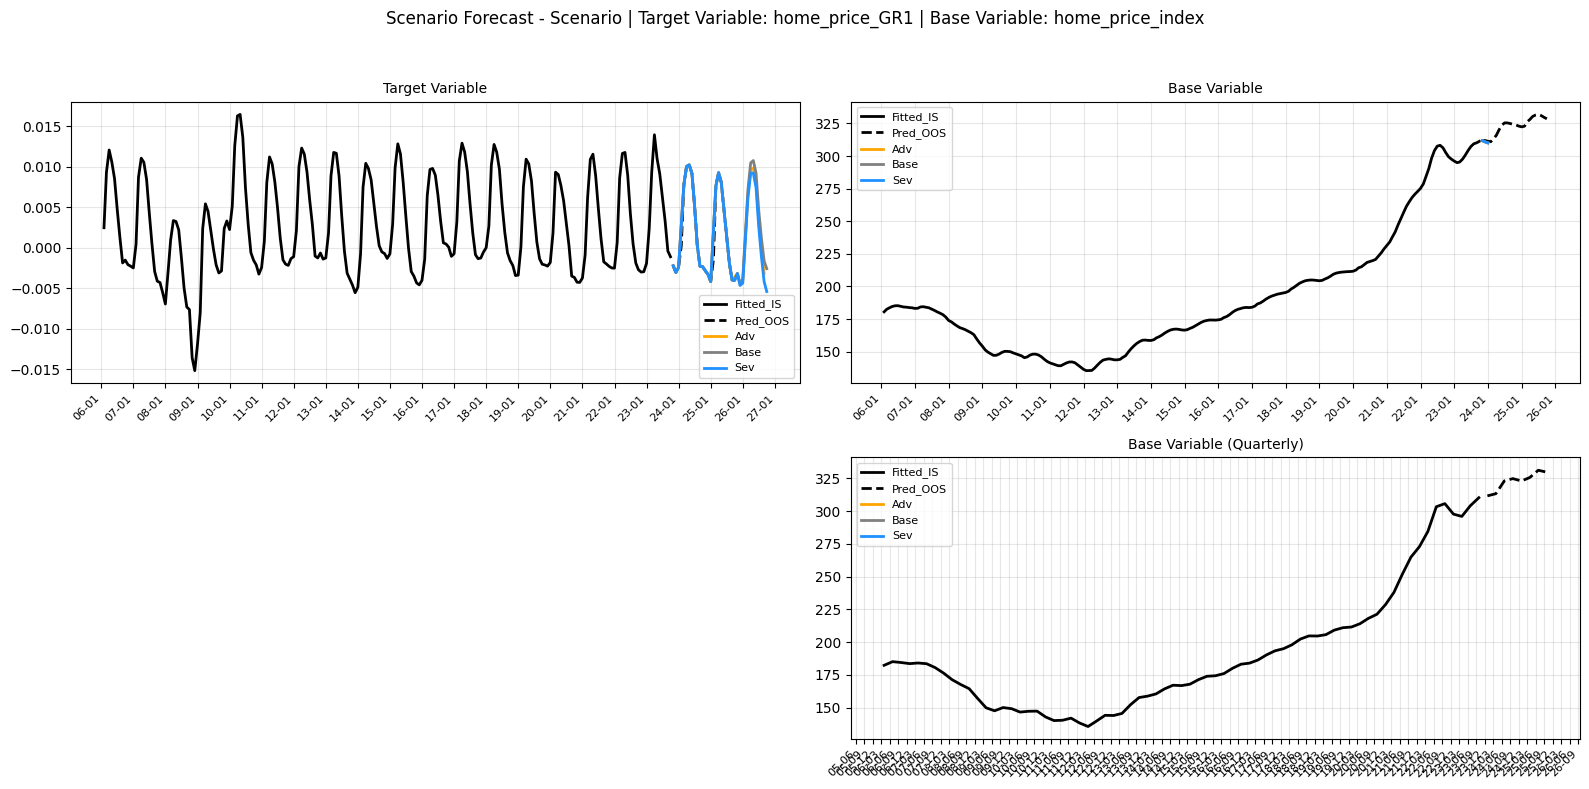

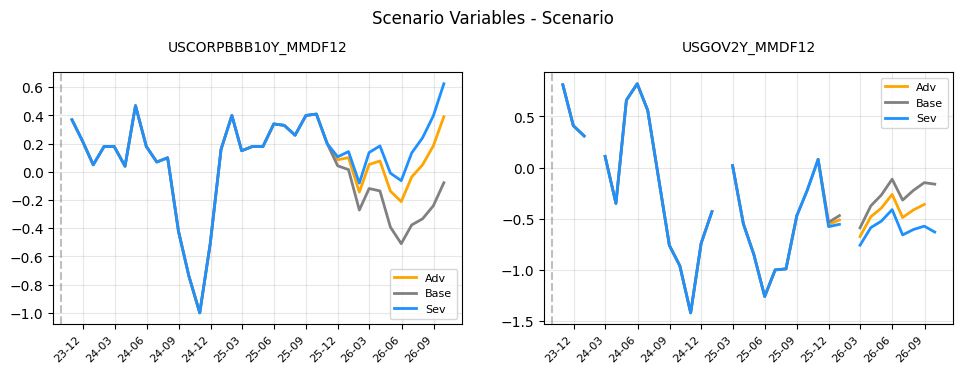

In [28]:
# ============================================================================
# Step 4: Deep-Dive Evaluation of Top Candidate(s)
# ============================================================================

# Inspect the top-ranked model in detail:
# - Parameter estimates and significance
# - Diagnostic test results (stationarity, stability, residual properties)
# - Scenario forecasts (Base, Adverse, Severely Adverse cases)
# - Economic interpretability of coefficients
seg.cms['cm1'].show_report(show_scens=True)  # Display all details including scenarios


In [23]:
# ============================================================================
# Step 5: Scenario Analysis - Detailed Forecast Inspection
# ============================================================================

# Extract the scenario manager from the top candidate model
# This object contains forecasts under different economic scenarios
print("\n" + "="*70)
print("SCENARIO FORECASTS - DETAILED INSPECTION")
print("="*70)
print("\nScenario Manager Details:")
print("-"*70)

scen = seg.cms['cm1'].scen_manager_in  # Access scenario forecasts